In [8]:
import keras
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [120]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [121]:
print(train_images.shape)
train_labels.shape



(60000, 28, 28)


(60000,)

In [17]:
from keras import models
from keras import layers

#Setting up network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(265, activation = 'relu'))
network.add(layers.Dense(10, activation='softmax'))



In [123]:
# the compile step
network.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [124]:
#scale data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [125]:
# ONE HOT ENCODED categorical transformation of labels
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [126]:
network.fit(train_images, train_labels, epochs=5, batch_size=128) #batch_size = 128 , It takes samples of tensors with a batch size of 128 (rows usually) at a time for training.
#This is why the first dimension of a tensors is usually called the tensor dimension/axis.  

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.4010 - accuracy: 0.8761
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0871 - accuracy: 0.9732
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0519 - accuracy: 0.9839
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0270 - accuracy: 0.9913


In [127]:
#evaluate the model performance on test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9782
test_acc: 0.9782000184059143


# Chapter 3.1 
Introduction with IMDB move ratings

In [128]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

In [129]:
max([max(sequence) for sequence in train_data]) #max value of a list comprehension 

9999

In [130]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [131]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [132]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [150]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#compile
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

If you wanna specify parameters of your optimizer, losses etc. 

In [134]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy])

In [146]:
#X train split
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
#Y train split
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Validation set
By splitting the train into validation and partial_x_train we can train and validate our model each step. Keeping X_test and Y_test until the very end. 

In [151]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20, #does 20 epochs
    batch_size=512, #Runs through batches of 512
    validation_data=(x_val, y_val)) #validate on other data. 

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5884 - accuracy: 0.7094 - val_loss: 0.3798 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3106 - accuracy: 0.9095 - val_loss: 0.3080 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2210 - accuracy: 0.9298 - val_loss: 0.2787 - val_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1676 - accuracy: 0.9525 - val_loss: 0.2733 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1335 - accuracy: 0.9605 - val_loss: 0.2884 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1063 - accuracy: 0.9710 - val_loss: 0.3145 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0973 - accuracy: 0.9722 - val_loss: 0.3203 - val_accuracy: 0.8831
Epoch 8/20
30

In [137]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']


['acc', 'loss', 'val_acc', 'val_loss']

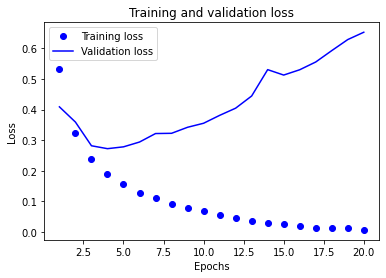

In [138]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict["val_binary_accuracy"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

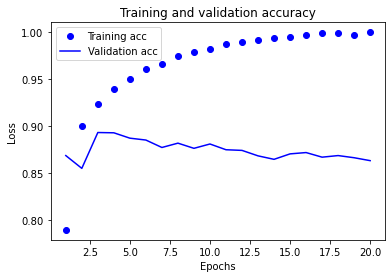

In [139]:
plt.clf()
acc_values = history_dict["binary_accuracy"]
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We're first finding the optimal hyperparameters for our model. ie. number of epochs, batch size etc.... Once that is done we can train our model one final time using our selected hyperparameters and then finally follow it up with an evaluation on the so far unseen test data. 

In [140]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.5645 - accuracy: 0.7443
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.2872 - accuracy: 0.9061
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2057 - accuracy: 0.9306
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2872 - accuracy: 0.8863


### Predict new data.
Ofcourse we can predict in the same manner as with our linear models. 

In [141]:
model.predict(x_test) 

array([[0.2355515 ],
       [0.999254  ],
       [0.94152284],
       ...,
       [0.1325689 ],
       [0.08038312],
       [0.5202245 ]], dtype=float32)

# Reuters Dataset 3.5.1 
Multi-class classification

In [1]:
#Load data 
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2113536/2110848 [==============================] - 2s 1us/step


/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/sigurd/opt/anaconda3/envs/method3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
train_data[10] # currently our train_data is a word of indicies. 

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [14]:
np.unique(train_labels) #The label associated with an example is an integer between 0 and 45—a topic index: 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])


557056/550378 [==============================] - 3s 5us/step


In [5]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [9]:
#Vectorise all words (X_matrix)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
#one hot encode the labels / y 
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Build the model 
In a stack of Dense layers like that you’ve been using, each layer can only access information
present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later
layers: each layer can potentially become an information bottleneck

In [23]:
#Create
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
#Compile
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Interpritation of the output given "softmax" and multi classificiation
The last layer uses a softmax activation. You saw this pattern in the MNIST
example. It means the network will output a probability distribution over the 46
different output classes—for every input sample, the network will produce a 46-
dimensional output vector, where output[i] is the probability that the sample
belongs to class i. The 46 scores will sum to 1.

In [24]:
#val and train
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [25]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

2021-12-08 14:37:45.905032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/20
16/16 [==============================] - 1s 44ms/step - loss: 3.2048 - accuracy: 0.4021 - val_loss: 1.8178 - val_accuracy: 0.6300
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.5743 - accuracy: 0.6817 - val_loss: 1.3503 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1000 - accuracy: 0.7666 - val_loss: 1.1553 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8632 - accuracy: 0.8178 - val_loss: 1.0461 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6895 - accuracy: 0.8542 - val_loss: 0.9701 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5299 - accuracy: 0.8919 - val_loss: 0.9284 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4160 - accuracy: 0.9189 - val_loss: 0.9082 - val_accuracy: 0.8190
Epoch 8/20
16

### Plotting the loss for TRAIN and VAL split. 

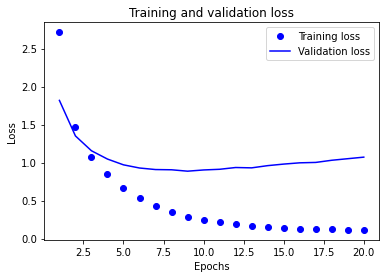

In [26]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

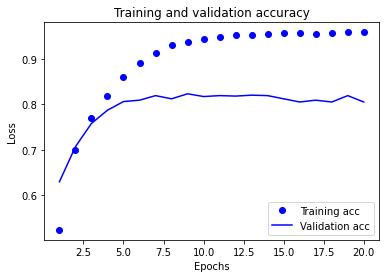

In [29]:

acc = history.history["accuracy"]
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Hyperparameter (epoch) selection. 
Through visual inspection we can see that validation **accuracy** starts to flatten around the 9th epoch and **loss** starts to increase after the 9th epoch. So a good idea would be to stop the training at that point to avoid overfitting. It could also be an idea to test different batch_sizes but for now it will remain constant 

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 38ms/step - loss: 3.2016 - accuracy: 0.4214 - val_loss: 1.7198 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 23ms/step - loss: 1.5233 - accuracy: 0.6873 - val_loss: 1.2818 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 22ms/step - loss: 1.0975 - accuracy: 0.7564 - val_loss: 1.1330 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8487 - accuracy: 0.8149 - val_loss: 1.0318 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 23ms/step - loss: 0.6560 - accuracy: 0.8595 - val_loss: 0.9843 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 0s 22ms/step - loss: 0.5496 - accuracy: 0.8808 - val_loss: 0.9150 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 23ms/step - loss: 0.4181 - accuracy: 0.9149 - val_loss: 0.9374 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [42]:
import copy
chance_level = []
for i in range (100):
    test_labels_copy = copy.copy(test_labels)
    np.random.shuffle(test_labels_copy)
    hits_array = np.array(test_labels) == np.array(test_labels_copy)
    chance_level.append(float(np.sum(hits_array)) / len(test_labels))
np.mean(chance_level)

0.18738201246660732

A complete random algorithm would approximate an 18.7% accuracy which compared to 78% on our test set is much worse. So we can at least conclude that our classification was somewhat succesfull. 

### Seeing prediction results in 46dimension vector with a propability for each of the 46 classes 

In [61]:
predictions = model.predict(x_test)
print(predictions[1])
print("Class:" , np.argmax(predictions[1]), " is the predicted class because it has the highest value / %")

[3.8034917e-04 2.1717900e-02 1.4297557e-02 7.3873198e-06 2.7572050e-05
 1.5657755e-02 2.3099007e-04 2.6450267e-05 3.1474578e-05 2.5983795e-04
 8.1808448e-01 1.9250276e-04 1.8684396e-04 1.4351778e-04 3.7130799e-02
 4.3702271e-06 3.1279898e-03 3.4198481e-05 1.8987476e-03 1.7235761e-05
 2.2064321e-02 6.9516514e-05 1.7596268e-03 9.5231868e-03 1.0227563e-02
 1.4131046e-03 6.6258712e-04 1.2452470e-03 2.6893551e-02 4.8544817e-04
 4.4715885e-04 8.9709098e-03 3.5234328e-04 4.9731934e-05 7.6484102e-06
 9.9779709e-07 1.5800562e-05 4.6775740e-04 8.6063170e-04 3.1113601e-04
 1.9388310e-04 4.8160905e-04 2.0967539e-06 2.8697094e-05 1.6417792e-06
 5.8187366e-06]
Class: 10  is the predicted class because it has the highest value / %


### If you don't wanna use HOT ONE ENCODED and instead want INTEGER LIST
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used in listing 3.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_crossentropy:

model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

### Explanation of categorical cross-entropy
Categorical crossentropy is almost always the loss function you should use for
such problems. It minimizes the distance between the probability distributions
output by the network and the true distribution of the targets.